In [1]:
import pandas as pd
import numpy as np

In [2]:
cig=pd.read_csv('C:\\All files\\CA\\Statistics\\PM_4_6_2018\\Case Studies\\Module 2\\Regression\\Case Studies\\Regression4\\Reg4.csv')
cig.head()

,State,Age,HS,Income,Black,Female,Price,Sales
0,AL,27.0,41.3,2948,26.2,51.7,42.7,89.8
1,AK,22.9,66.1,4644,3.0,45.7,41.8,121.3
2,Az,26.3,58.1,3665,3.0,50.8,38.5,115.2
3,AR,29.1,39.9,2878,18.3,51.5,38.8,100.3
4,CA,28.1,62.6,4493,7.0,50.8,39.7,123.0


In [15]:
cig.dtypes

State      object
Age       float64
HS        float64
Income      int64
Black     float64
Female    float64
Price     float64
Sales     float64
dtype: object

In [16]:
cig.describe() # Univariate analysis

,Age,HS,Income,Black,Female,Price,Sales
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,27.466667,53.125490,3763.705882,9.874510,50.950980,38.062745,121.529412
std,1.876983,7.982377,594.715639,12.702596,1.111463,4.110132,32.016498
min,22.900000,37.800000,2626.000000,0.200000,45.700000,29.000000,65.500000
25%,26.400000,48.300000,3271.000000,1.250000,50.750000,34.700000,105.350000
50%,27.400000,53.300000,3751.000000,5.700000,51.100000,38.900000,119.000000
75%,28.750000,59.100000,4116.500000,13.550000,51.500000,41.350000,124.550000
max,32.300000,67.300000,5079.000000,71.100000,53.500000,45.500000,265.100000


In [23]:
cig.columns

Index(['State', 'Age', 'HS', 'Income', 'Black', 'Female', 'Price', 'Sales'], dtype='object')

In [27]:
cig.isnull().sum() # Univariate analysis , we have to to this before Bivariate Analysis

State     0
Age       0
HS        0
Income    0
Black     0
Female    0
Price     0
Sales     0
dtype: int64

In [28]:
cig.corr() # Bivariate Analysis

,Age,HS,Income,Black,Female,Price,Sales
Age,1.000000,-0.097761,0.256581,-0.040326,0.553032,0.243839,0.226830
HS,-0.097761,1.000000,0.530641,-0.482835,-0.412948,0.055747,0.066885
Income,0.256581,0.530641,1.000000,0.027566,-0.068827,0.214502,0.326633
Black,-0.040326,-0.482835,0.027566,1.000000,0.449406,-0.129045,0.179272
Female,0.553032,-0.412948,-0.068827,0.449406,1.000000,0.019819,0.146417
Price,0.243839,0.055747,0.214502,-0.129045,0.019819,1.000000,-0.300820
Sales,0.226830,0.066885,0.326633,0.179272,0.146417,-0.300820,1.000000


In [29]:
import statsmodels.formula.api as smf

In [30]:
ln=smf.ols('Sales~Age+HS+Income+Black+Female+Price',data=cig).fit()

In [6]:
ln.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     3.438
Date:                Sat, 27 Apr 2019   Prob (F-statistic):            0.00717
Time:                        11:48:32   Log-Likelihood:                -238.84
No. Observations:                  51   AIC:                             491.7
Df Residuals:                      44   BIC:                             505.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.9793    246.288      0.406      0.687    -396.381     596.339
Age            4.3639      3.215      1.357      0.182      -2.115      10.843
HS            -0.1123      0.796     -0.141      0.888      -1.716       1.491
Income         0.0194      0.010      1.926      0.061      -0.001       0.040
Black          0.3148      0.475      0.662      0.511      -0.643       1.272
Female        -0.8511      5.565     -0.153      0.879     -12.067      10.365
Price         -3.2901      1.030     -3.195      0.003      -5.366      -1.215
==============================================================================
Omnibus:                       55.516   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              343.546
Skew:                           2.806   Prob(JB):                     2.51e-75
Kurtosis:                      14.409   Cond. No.                     2.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Price is Significant and Income is near to 0.05 Hence considering that too

Step 1	Check Variable singnificance	Anova test
Step 3	Interpritation	If Price is -3.2901 then avg Sales is 99.9793  
Step 4	Slop	If Price inc by 1 , Sales dec by -3.2901
(In above we have cosidered for Price, like this we can check for all other vaiables too)

Validation of Model
R squre is 0.319, it should by 1 for very good model, here it is not good
Ajd R squre is 0.226 , same as above , hence not good
Anova = Fvalue,F-statistic: 3.438, Pvalue,Prob (F-statistic):0.00717 , P value is less than 0.05 hence accepting Alternate Hypotisis that is we are rejecting null hypotisi,So Atleast one of the indep vairable is significant.
RMSE = AIC: 491.7 , Use to comparie the 2 models , now it not required as we are not checking with 2 models.



In [ ]:
# 
Now we check all the 4 Ols assumptions

1. Error Shd follow Normal Distribution
2.Error shd not follow Heterosedasity
3. No Multicollinerality among Ind Variable
4. No Serial/Auto Correlation in Error.

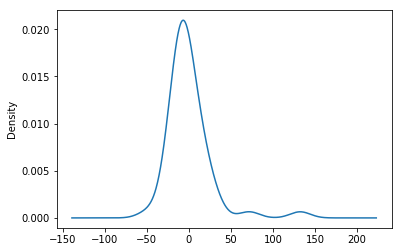

In [34]:
1. Error Shd follow Normal Distribution

import matplotlib.pyplot as plt
plt.figure()
ln.resid.plot.density()
plt.show()


# this is we are checkign for normal distribution
Interpritation - It is satisying this Normaldistirbution , as it is almost bellshape.
That is, the error is following approximate Normaldistribution

In [ ]:
2.Error shd not follow Heterosedasity
This we can find out by Residual Plot - It is a catter plot btw predicted(Fittedvalue) and Error/Residual

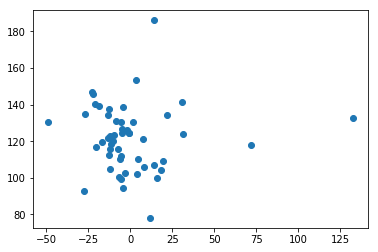

In [36]:
plt.scatter(ln.resid,ln.fittedvalues)

In [ ]:
# by the above graph we can see it is homoscedasity because there is no any pattern in error distribution.
This graph also helps to find Outlayer 

In [ ]:
# 3. No Multicollinerality among Ind Variable
There is no package for it , we need to write the formula 
we can check by VIF
If VIF is less then 5 , then there is no Multi

In [38]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
import statsmodels.formula.api as sm
def vif_cal(input_data,dependent_col):
    x_vars=input_data.drop([dependent_col],axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x",data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print(xvar_names[i],'VIF=',vif)

In [52]:
vif_cal(input_data=cig,dependent_col='Sales')

Age VIF= 2.3
HS VIF= 2.54
Income VIF= 2.27
Black VIF= 2.3
Female VIF= 2.41
Price VIF= 1.13


In [ ]:
# All the VIF value is less than 5 , hence there is no Multicollinarity exist in the above data 

In [41]:
del cig['State']

In [42]:
cig.columns

Index(['Age', 'HS', 'Income', 'Black', 'Female', 'Price', 'Sales'], dtype='object')

In [53]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
import statsmodels.formula.api as sm
def vif_cal(input_data,dependent_col):
    x_vars=input_data.drop([dependent_col],axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x",data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print(xvar_names[i],'VIF=',vif)

In [ ]:
# 4.No Serial/Auto/self Correlation in Errors

DW result is there in summary of the model.
Durbin-Watson: 1.656 ( around 1.5 to 2 we can consider) 
DW value shd be close to 2
Hence we conclude that there is no Self/Auto/Serial correlation. 

In [55]:
vif_cal(input_data=cig,dependent_col='Sales')

Age VIF= 2.3
HS VIF= 2.54
Income VIF= 2.27
Black VIF= 2.3
Female VIF= 2.41
Price VIF= 1.13


In [7]:
ln1=smf.ols('Sales~Price+Income',data=cig).fit()

In [8]:
ln1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     8.038
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           0.000976
Time:                        11:48:32   Log-Likelihood:                -241.27
No. Observations:                  51   AIC:                             488.5
Df Residuals:                      48   BIC:                             494.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    153.7193     41.278      3.724      0.001      70.725     236.713
Price         -3.0284      0.996     -3.040      0.004      -5.032      -1.025
Income         0.0221      0.007      3.206      0.002       0.008       0.036
==============================================================================
Omnibus:                       45.170   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.683
Skew:                           2.208   Prob(JB):                     4.42e-49
Kurtosis:                      12.235   Cond. No.                     3.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Sales=153.71-3.02*Prixce+0.02*Income

In [10]:
import matplotlib.pyplot as plt

(array([ 4.,  2.,  2.,  6.,  4.,  7., 11., 10.,  2.,  3.]),
 array([29.  , 30.65, 32.3 , 33.95, 35.6 , 37.25, 38.9 , 40.55, 42.2 ,
        43.85, 45.5 ]),
 <a list of 10 Patch objects>)

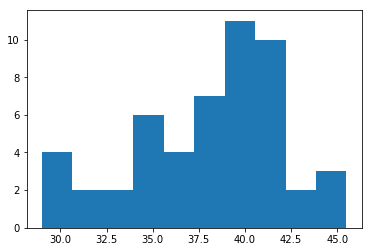

In [11]:
plt.hist(cig.Price)

(array([ 1.,  8.,  7.,  4., 11.,  7.,  3.,  4.,  4.,  2.]),
 array([2626. , 2871.3, 3116.6, 3361.9, 3607.2, 3852.5, 4097.8, 4343.1,
        4588.4, 4833.7, 5079. ]),
 <a list of 10 Patch objects>)

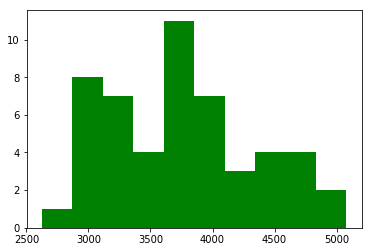

In [12]:
plt.hist(cig.Income,color='g')